# Data Preprocessing

In [2]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Original data format

In [4]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosenbaum, Miss. Edith Louise",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN


### Convert text format column to integer class

In [3]:
# Sex : male -> 0, female -> 1
for df in [df_train, df_test]:
    df.loc[ df["Sex"] == "male", "Sex"] = 0
    df.loc[ df["Sex"] == "female", "Sex"] = 1
    df["Sex"] = df["Sex"].astype(int)

In [4]:
# Embarked : S -> 0, Q -> 1, C -> 2
for df in [df_train, df_test]:
    df.loc[ df["Embarked"] == "S", "Embarked"] = 0
    df.loc[ df["Embarked"] == "Q", "Embarked"] = 1
    df.loc[ df["Embarked"] == "C", "Embarked"] = 2
    df["Embarked"] = df["Embarked"].fillna(0)  # because S is most frequent
    df["Embarked"] = df["Embarked"].astype(int)

### Fill nan value by mean of column

In [5]:
for df in [df_train, df_test]:
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

### See feature relation
>Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [115]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.026749
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.224719
Embarked,-0.013128,0.167675,-0.162098,0.108262,0.026749,-0.068230,-0.039798,0.224719,1.000000


### Normalize features

In [6]:
def normalize(_df, colname):
    df = _df[:]  # Deepcopy here
    df[colname] = (df[colname] - df[colname].mean()) / df[colname].std()
    return df

df_train_normalize = df_train[:]
for colname in ["Pclass", "Age", "SibSp", "Parch", "Fare"]:
    df_train_normalize = normalize(df_train_normalize, colname)

df_test_normalize = df_test[:]
for colname in ["Pclass", "Age", "SibSp", "Parch", "Fare"]:
    df_test_normalize = normalize(df_test_normalize, colname)
    
df_train_normalize.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,8.910000e+02,891,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,891,8.910000e+02,204,891.000000
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,NaN
top,NaN,NaN,NaN,"Graham, Mr. George Edward",NaN,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,NaN
mean,446.000000,0.383838,-7.575933e-17,NaN,0.352413,2.272780e-16,3.588600e-17,4.585433e-17,NaN,-1.196200e-17,NaN,0.463524
std,257.353842,0.486592,1.000000e+00,NaN,0.477990,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,0.791503
min,1.000000,0.000000,-1.565228e+00,NaN,0.000000,-2.251891e+00,-4.742788e-01,-4.734077e-01,NaN,-6.480577e-01,NaN,0.000000
25%,223.500000,0.000000,-3.691575e-01,NaN,0.000000,-5.921480e-01,-4.742788e-01,-4.734077e-01,NaN,-4.888737e-01,NaN,0.000000
50%,446.000000,0.000000,8.269128e-01,NaN,0.000000,0.000000e+00,-4.742788e-01,-4.734077e-01,NaN,-3.571902e-01,NaN,0.000000
75%,668.500000,1.000000,8.269128e-01,NaN,1.000000,4.076970e-01,4.325504e-01,-4.734077e-01,NaN,-2.423274e-02,NaN,1.000000


# Solution

### Drop unnecessary column (unneccesary for learning)
- PasserngerId
- Survived (target feature)
- Name (text format column)
- Ticket (text format column
- Cabin

In [7]:
df_trainX = df_train.drop(["PassengerId", "Survived","Name", "Ticket", "Cabin"], axis=1)
df_norm_trainX = df_train_normalize.drop(["PassengerId", "Survived","Name", "Ticket", "Cabin"], axis=1)
df_testX = df_test.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1)
df_norm_testX = df_test_normalize.drop(["PassengerId","Name", "Ticket", "Cabin"], axis=1)

### Convert data format

In [8]:
from keras.utils import np_utils
trainX = df_trainX.as_matrix()
testX = df_testX.as_matrix()
norm_trainX = df_norm_trainX.as_matrix()
norm_testX = df_norm_testX.as_matrix()
trainy = df_train["Survived"].as_matrix()
trainY = np_utils.to_categorical(trainy, 2)

Using Theano backend.


## Create Weak Neural Network

### Define network architecture

In [72]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(100, input_shape=(7,)))
model.add(Activation("relu"))
model.add(Dense(30))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### Train network

In [73]:
history = model.fit(norm_trainX, trainY, batch_size=128, nb_epoch=3000, verbose=0, validation_split=0.1)

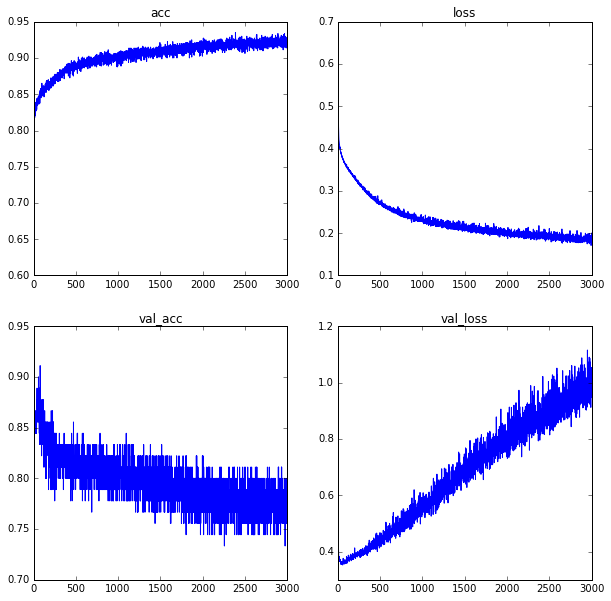

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for idx, key in enumerate(history.history, start=1):
    plt.subplot(2, 2, idx)
    plt.plot(range(len(history.history[key])), history.history[key])
    plt.title(key)
plt.show()

### See training error

In [75]:
import numpy as np
prediction = model.predict(norm_trainX)
correct_num = len([match for match in np.argmax(prediction, axis=1) == trainy if match])
correct_rate = correct_num * 1.0 / trainX.shape[0]
print "Accuracy on training set = %f" % correct_rate

Accuracy on training set = 0.911336


### See test error by submitting answer

`>> score = 0.76077`  
Overfitting ...

### Helper functions to generate histgram of activation behavior

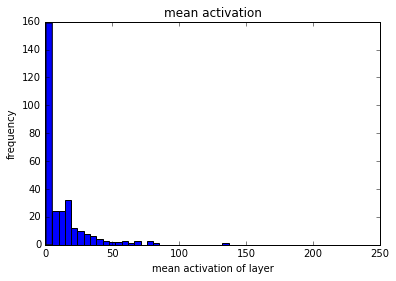

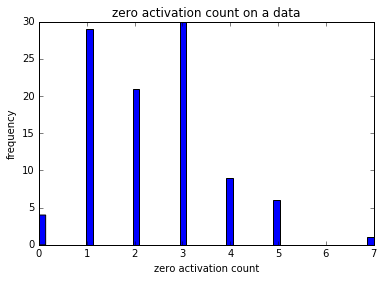

In [76]:
statistics = take_statistics(model, trainX[:100])
gen_hist_from_statistics(statistics)

## Create Strong Neural Network

### Define network architecture

In [64]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(1000, input_shape=(7,), W_constraint=maxnorm(3)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(500, W_constraint=maxnorm(3)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### Train network

In [65]:
history = model.fit(norm_trainX, trainY, batch_size=128, nb_epoch=3000, verbose=0, validation_split=0.1)

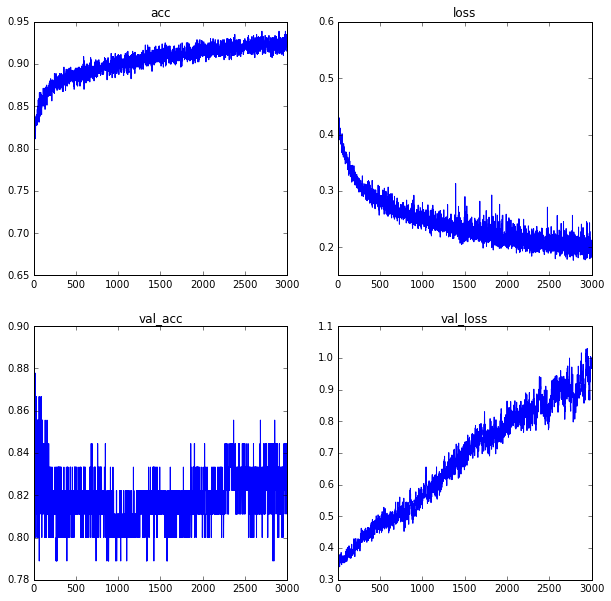

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for idx, key in enumerate(history.history, start=1):
    plt.subplot(2, 2, idx)
    plt.plot(range(len(history.history[key])), history.history[key])
    plt.title(key)
plt.show()

### See training error

In [70]:
import numpy as np
prediction = model.predict(norm_trainX)
correct_num = len([match for match in np.argmax(prediction, axis=1) == trainy if match])
correct_rate = correct_num * 1.0 / trainX.shape[0]
print "Accuracy on training set = %f" % correct_rate

Accuracy on training set = 0.927048


### See test error by submitting answer

In [69]:
test_prediction = model.predict(norm_testX)
one_hot = np.argmax(test_prediction, axis=1)
test_passenger_ids = df_test["PassengerId"].as_matrix()
ans = [[pid, pred] for pid, pred in zip(test_passenger_ids, one_hot)]
np.savetxt("nn1_ans.csv", np.array(ans), fmt="%d", delimiter=",", header="PassengerId,Survived")

`>> score = 0.73206,`  
Overfitting ...

### Helper functions to generate histgram of activation behavior

In [44]:
import keras.backend as K

def fetch_activation_layers(model):
    return [layer for layer in model.layers if type(layer) == Activation]
    
def flow_input_through_layer(model, layer, X):
    inputs = [K.learning_phase()] + model.inputs
    layer_func = K.function(inputs, [layer.output])
    return layer_func([0, [X]])[0]

def flow_input_through_model(model, X):
    curry = lambda layer: flow_input_through_layer(model, layer, X)
    return reduce(lambda acc, layer: acc + [curry(layer)], fetch_activation_layers(model), [])

def summary_output_of_layer(layer, out):
    name = layer.name
    mean_activation = out.mean()
    elem_num = reduce(lambda acc, e: acc * e, out.shape, 1)
    zero_num = elem_num - np.count_nonzero(out)
    return name, mean_activation, elem_num, zero_num

def summary_output_of_model(model, output_holder):
    return reduce(lambda acc, arg: acc + [summary_output_of_layer(*arg)],
                  zip( fetch_activation_layers(model), output_holder), [])

def take_statistics(model, targetX):
    flow_c = lambda X: flow_input_through_model(model, X)
    fetch_c = lambda holder: summary_output_of_model(model, holder)
    return np.array(map(fetch_c, map(flow_c, targetX)))

def gen_mean_activation_hist(means):
    m = means.astype(np.float).reshape(means.size)
    plt.hist(m, bins=np.arange(m.min(), m.max(), (m.max()-m.min())/50))
    plt.title("mean activation")
    plt.xlabel("mean activation of layer")
    plt.ylabel("frequency")
    plt.show()

def gen_zero_num_hist(zero_counts):
    z = zero_counts.astype(np.int)
    plt.hist(z.T.sum(1), bins=50)
    plt.title("zero activation count on a data")
    plt.xlabel("zero activation count")
    plt.ylabel("frequency")
    plt.show()
    
def gen_hist_from_statistics(statistics):
    names, means, elem_nums, zero_nums = statistics.T
    gen_mean_activation_hist(means)
    gen_zero_num_hist(zero_nums)

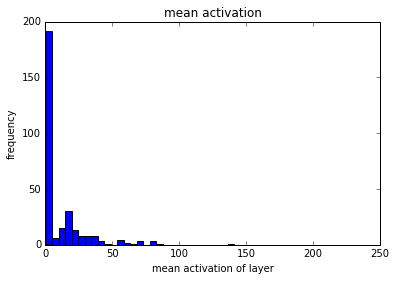

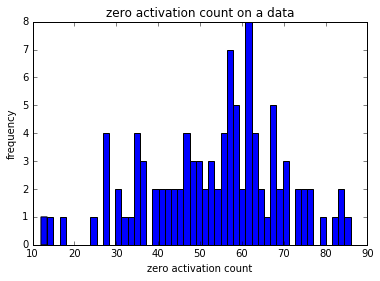

In [68]:
statistics = take_statistics(model, trainX[:100])
gen_hist_from_statistics(statistics)